# Example `Dysmalpy` 2D fitting, using fitting wrapper

**Includes the following components:**

 - Disk + Bulge
 - NFW halo
 - Constant velocity dispersion

## Setup steps ##

**Import modules**

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from dysmalpy.fitting_wrappers import dysmalpy_fit_single_2D
from dysmalpy.fitting_wrappers import utils_io
from dysmalpy import fitting

import os

import numpy as np

**Setup notebook**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import Image

**Set data, output paths**

- Note this will override the `datadir` and `outdir` specified in the param file. 

    * *(This is useful for the example here. When running from command line, it's recommended to properly set the directories in the param file.)*

In [3]:
# Data directory
datadir = '/Users/sedona/data/dysmalpy_example_data/'
#'/YOUR/DATA/PATH/'

# Where to save output files
outdir = '/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_2D_FITTING_WRAPPER/'
outdir_mpfit = outdir + 'MPFIT/'


param_filename = '/Users/sedona/data/dysmalpy_test_examples/fitting_2D_mpfit.params'

-------------------

**Settings in parameter file:**

In [4]:
with open(param_filename, 'r') as f:
    print(f.read())

# Example parameters file for fitting a single object with 1D data
# Note: DO NOT CHANGE THE NAMES IN THE 1ST COLUMN AND KEEP THE COMMAS!!
# See README for a description of each parameter and its available options.

# ******************************* OBJECT INFO **********************************
galID,    GS4_43501    # Name of your object
z,        1.613        # Redshift


# ****************************** DATA INFO *************************************

#datadir,          None                                   # Optional: Full path to data directory.
datadir,   /Users/sedona/data/dysmalpy_example_data/

fdata_vel,            GS4_43501_Ha_vm.fits        # Full path to vel map. Alternatively, just the filename if 'datadir' is set.
fdata_verr,           GS4_43501_Ha_vm_err.fits    # Full path to vel. err map. Alternatively, just the filename if 'datadir' is set.
fdata_disp,           GS4_43501_Ha_dm.fits        # Full path to disp map. Alternatively, just the filename if 'datadir' is se

**Add some settings for this notebook example:**

In [5]:
plot_type = 'png'

---------

## Run `Dysmalpy` fitting: 2D wrapper, with fit method= MPFIT ##

In [6]:
dysmalpy_fit_single_2D.dysmalpy_fit_single_2D(param_filename=param_filename, 
                                    datadir=datadir, outdir=outdir_mpfit,
                                    plot_type='png')

INFO:DysmalPy:Making path=/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_2D_FITTING_WRAPPER/MPFIT/
INFO:DysmalPy:*************************************
INFO:DysmalPy: Fitting: GS4_43501 using MPFIT
INFO:DysmalPy:    velocity file: /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_vm.fits
INFO:DysmalPy:    dispers. file: /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_dm.fits
INFO:DysmalPy:
mvirial_tied: <function tie_lmvirial_NFW at 0x1a1d521a60>
INFO:DysmalPy:nSubpixels: 3
INFO:DysmalPy:
MPFIT Fitting:
Start: 2021-06-14 11:00:41.979194

INFO:DysmalPy:Iter 1  CHI-SQUARE = 20216.54819  DOF = 402
   disk+bulge:total_mass = 11  
   disk+bulge:r_eff_disk = 5  
   disk+bulge:bt = 0.3  
   halo:fdm = 0.5  
   dispprof:sigma0 = 39  
   geom:inc = 62  
   geom:pa = 142  
   geom:xshift = 0  
   geom:yshift = 0  
   geom:vel_shift = 0  

INFO:DysmalPy:Iter 2  CHI-SQUARE = 6519.86451  DOF = 402
   disk+bulge:total_mass = 10.88382519  
   disk+bulge:r_eff_disk = 4.865257538  
 

------

## Examine results ##

### Result plots ###

**Read in parameter file**

In [7]:
params = utils_io.read_fitting_params(fname=param_filename)

# Override data + output paths:
params['datadir'] = datadir
params['outdir'] = outdir_mpfit

# Add the plot type:
params['plot_type'] = plot_type


f_galmodel = params['outdir'] + '{}_galaxy_model.pickle'.format(params['galID'])
f_results =  params['outdir'] + '{}_{}_results.pickle'.format(params['galID'], 
                                                        params['fit_method'])

**Best-fit plot**

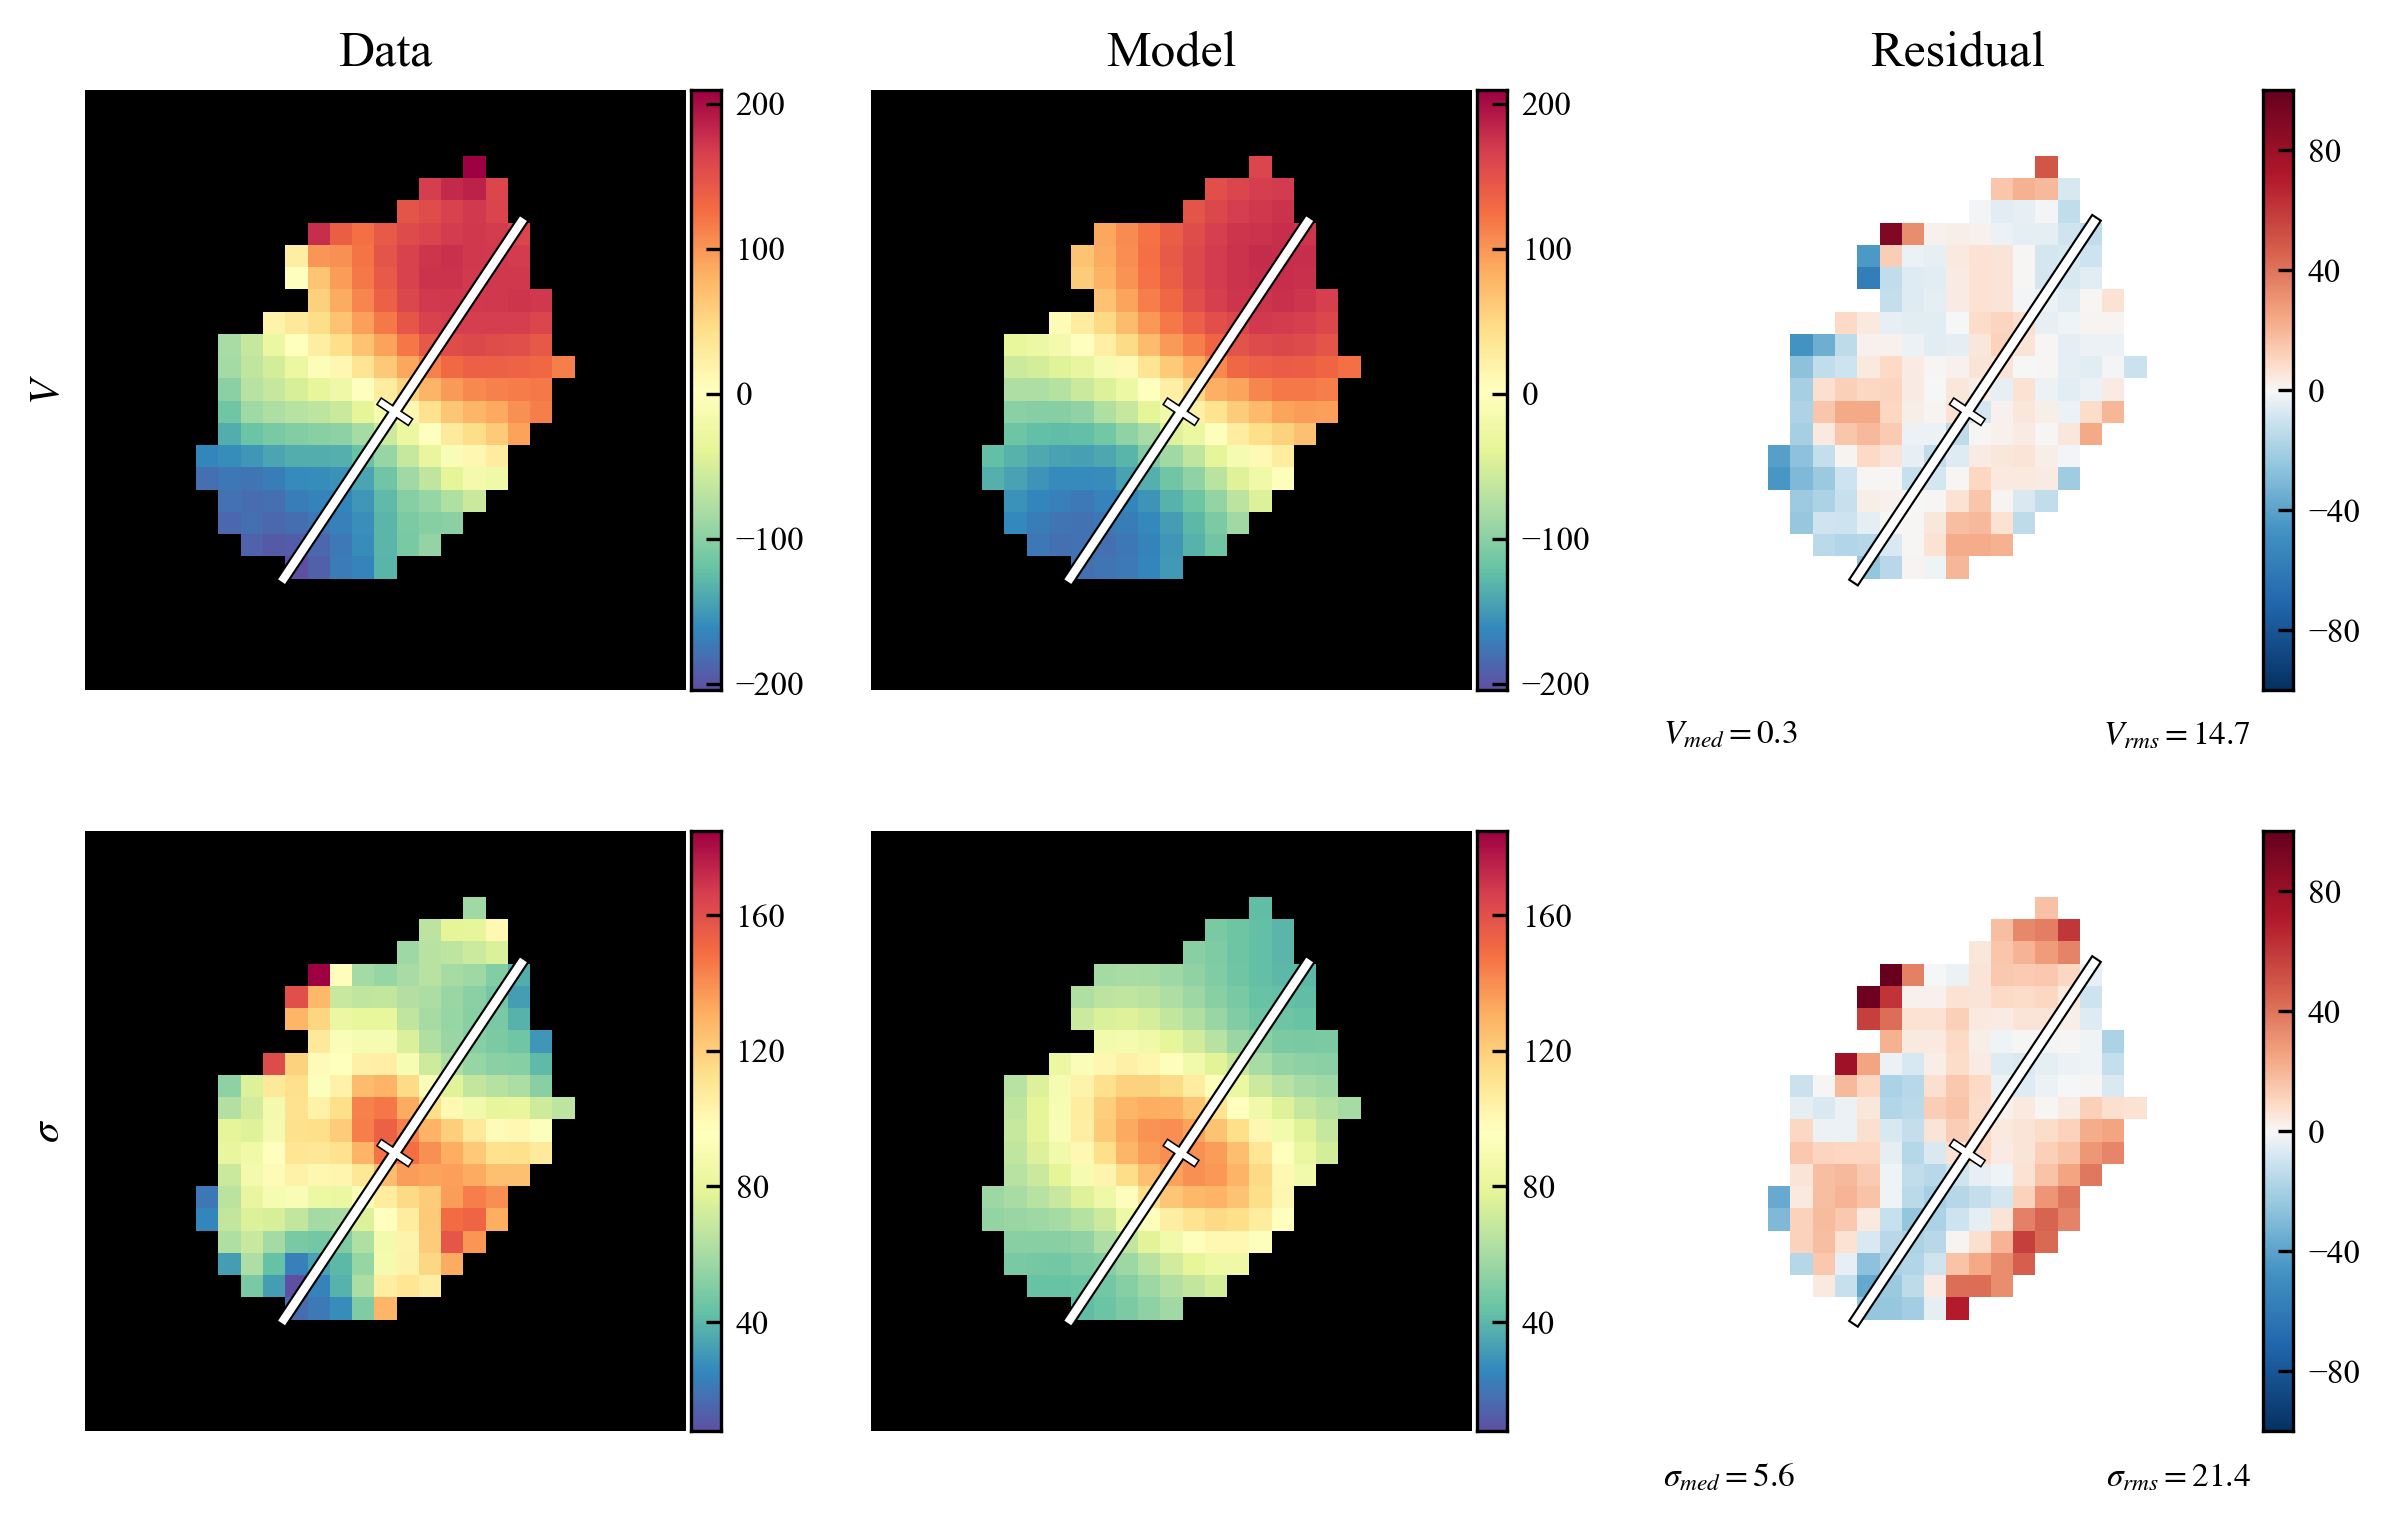

In [8]:
# Look at best-fit:
filepath = outdir_mpfit+"{}_mpfit_best_fit.{}".format(params['galID'], params['plot_type'])
Image(filename=filepath, width=600)

#### Directly generating result plots ####

**Reload the galaxy, results files:**

In [9]:
gal, results = fitting.reload_all_fitting(filename_galmodel=f_galmodel, 
                        filename_results=f_results, fit_method=params['fit_method'])

**Plot the best-fit results:**

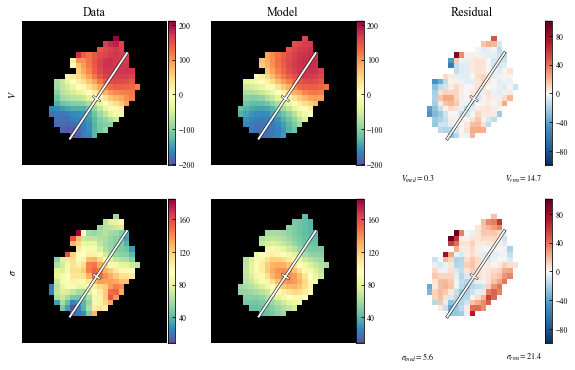

In [10]:
%matplotlib inline
results.plot_results(gal, fitdispersion=params['fitdispersion'], 
                          oversample=params['oversample'], 
                          oversize=params['oversize'])

--------

### Results reports ###

We now look at the results reports, which include the best-fit values and uncertainties (as well as other fitting settings and output).

In [11]:
# Print report
print(results.results_report(gal=gal))

###############################
 Fitting for GS4_43501

Date: 2021-06-14 11:03:41.822593

Datafiles:
 vel:  /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_vm.fits
 disp: /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_dm.fits

Fitting method: MPFIT

zcalc_truncate:        [Default: True]
n_wholepix_z_min:      [Default: 3]
oversample:            [Default: 1]
oversize:              [Default: 1]

pressure_support:      True
pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass       10.8575  +/-   0.0273
    r_eff_disk        4.1239  +/-   0.1646
    bt                0.3873  +/-   0.0408

    n_disk            1.0000  [FIXED]
    r_eff_bulge       1.0000  [FIXED]
    n_bulge           4.0000  [FIXED]

    noord_flat        True
-----------
 halo
    fdm               0.1798  +/-   0.0302

    mvirial          11.6602  [TIED]
    conc              5.0000  [FIXED]
-----------
 dispprof
    sigma0           33.2789  +

**To <span style="color:DarkCyan">directly save</span> the results report** to a file, we can use the following:

In [12]:
# Save report to file:
f_report = params['outdir'] + '{}_fit_report.txt'.format(params['galID'])
results.results_report(gal=gal, filename=f_report)

**Also note the fitting wrappers automatically save two versions of the report files:**

In [13]:
f_report_pretty =   params['outdir'] + '{}_{}_best_fit_results_report.info'.format(params['galID'], 
                                                            params['fit_method'])
f_report_machine =  params['outdir'] + '{}_{}_best_fit_results.dat'.format(params['galID'], 
                                                            params['fit_method'])

The "pretty" version, automatically saved as `*_best_fit_results_report.info`, is formatted to be human-readable, and includes more information on the fit settings at the beginning (for reference).

In [14]:
with open(f_report_pretty, 'r') as f:
    lines = [line.rstrip() for line in f]
    for line in lines: print(line)

###############################
 Fitting for GS4_43501

Date: 2021-06-14 11:03:40.486861

Datafiles:
 vel:  /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_vm.fits
 disp: /Users/sedona/data/dysmalpy_example_data/GS4_43501_Ha_dm.fits
Paramfile: fitting_2D_mpfit.params

Fitting method: MPFIT

fitdispersion:         True
fitflux:               False

moment_calc:           True
zcalc_truncate:        [Default: True]
n_wholepix_z_min:      [Default: 3]
oversample:            3
oversize:              1

pressure_support:      True
pressure_support_type: 1

###############################
 Fitting results
-----------
 disk+bulge
    total_mass       10.8575  +/-   0.0273
    r_eff_disk        4.1239  +/-   0.1646
    bt                0.3873  +/-   0.0408

    n_disk            1.0000  [FIXED]
    r_eff_bulge       1.0000  [FIXED]
    n_bulge           4.0000  [FIXED]

    noord_flat        True
-----------
 halo
    fdm               0.1798  +/-   0.0302

    mvirial          11.6602 

The "machine" version, automatically saved as `*_best_fit_results.dat`, is formatted as a machine-readable space-separated ascii file. It includes key parameter fit information, as well as the best-fit reduced chisq.

In [15]:
with open(f_report_machine, 'r') as f:
    lines = [line.rstrip() for line in f]
    for line in lines: print(line)

# component             param_name    fixed       best_value   l68_err     u68_err
disk+bulge              total_mass    False        10.8575      0.0273      0.0273
disk+bulge              r_eff_disk    False         4.1239      0.1646      0.1646
disk+bulge              n_disk        True          1.0000    -99.0000    -99.0000
disk+bulge              r_eff_bulge   True          1.0000    -99.0000    -99.0000
disk+bulge              n_bulge       True          4.0000    -99.0000    -99.0000
disk+bulge              bt            False         0.3873      0.0408      0.0408
halo                    mvirial       TIED         11.6602    -99.0000    -99.0000
halo                    fdm           False         0.1798      0.0302      0.0302
halo                    conc          True          5.0000    -99.0000    -99.0000
dispprof                sigma0        False        33.2789      1.1213      1.1213
zheightgaus             sigmaz        TIED          0.7005    -99.0000    -99.0000
geom